In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("/content/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [8]:
df.sample(5)

,area,bedrooms,price
14,2250,3,101.00
7,3300,4,155.00
0,1056,2,39.07
9,3700,5,167.00
13,1100,2,40.00


In [9]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [10]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [11]:
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [12]:
scaled_Y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

## **GRADIENT DESCENT**(GD)

In [14]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    y_predicted = np.dot(w,X.T)+b
    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w-learning_rate*w_grad
    b = b-learning_rate*b_grad

    cost = np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

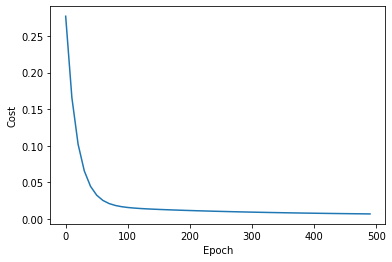

In [15]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)

In [16]:
def predict(area,bedrooms,w,b):
  scaled_X = sx.transform([[area,bedrooms]])[0]
  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]
predict(2600,4,w,b)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [17]:
predict(1000,2,w,b)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [18]:
predict(1500,3,w,b)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

## **STOCHASTIC GRADIENT DESCENT**(SGD)

In [21]:
import random
random.randint(0,6)

0

In [23]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
  number_of_features = X.shape[1]
  w_sgd = np.ones(shape=(number_of_features))
  b_sgd = 0
  total_samples = X.shape[0]

  cost_list_sgd = []
  epoch_list_sgd = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w_sgd,sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w_sgd = w_sgd-learning_rate*w_grad
    b_sgd = b_sgd-learning_rate*b_grad

    cost_sgd = np.square(sample_y-y_predicted)
    if i%100 == 0:
      cost_list_sgd.append(cost_sgd)
      epoch_list_sgd.append(i)

  return w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),1000)
w_sgd,b_sgd,cost_sgd

(array([0.88095744, 0.86211031]), -0.2007603136284326, 0.07886625764966114)

In [24]:
w,b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

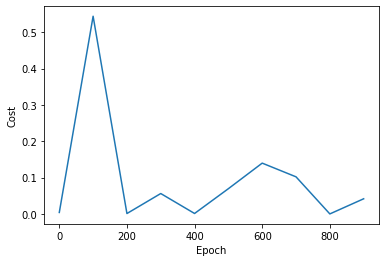

In [25]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [26]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


166.00418501210157

In [27]:
predict(1000,2,w_sgd,b_sgd)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


42.19559831984754

In [28]:
predict(1500,3,w_sgd,b_sgd)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


91.796865322754